# 패키지 불러오기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 데이터 불러오기

(400, 600, 3)


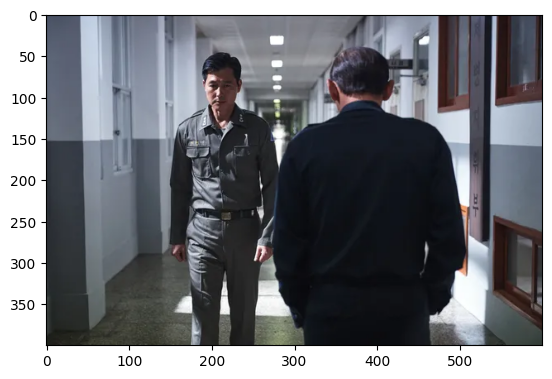

In [2]:
# 이미지 경로 및 불러오기
img_path = 'images/person_image.webp'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# 이미지 출력
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 사전 훈련 모델 불러오기
- 이미 로컬환경에 모델이 있어 주석처리 하겠습니다.

In [3]:
model_dir = 'models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url
# model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드
# urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

In [4]:
# 모델 선언
model = semantic_segmentation()
# 다운로드한 모델을 로드
model.load_pascalvoc_model(model_file)

In [5]:
# 이미지 세그멘테이션 [세그멘테이션된 이미지, 세그멘테이션된 이미지의 색상값]
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc에서 제공하는 데이터 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

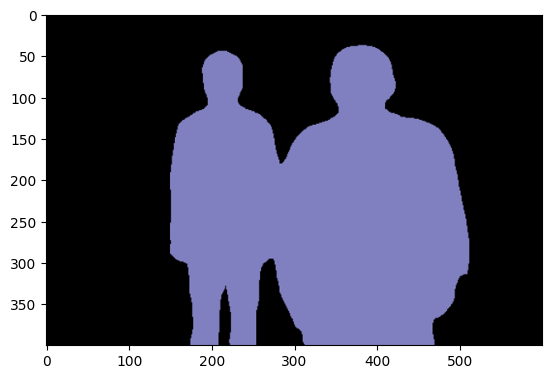

In [7]:
# 분할된 이미지 출력
plt.imshow(output)
plt.show()

In [8]:
# 분할된 이미지 출력
segvalues

{'class_ids': array([ 0, 15], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
# 분할된 이미지의 클래스 아이디 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
# 컬러맵 생성
# 256개의 색상을 가지는 컬러맵 생성
colormap = np.zeros((256, 3), dtype = int)
# 0~255까지의 값을 가지는 배열 생성
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
# 컬러맵 출력
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
# 15번 클래스의 컬러값 출력
colormap[15]

array([192, 128, 128])

In [12]:
# BGR 컬러값을 RGB로 변환
seg_color = (128,128,192)

(400, 600)


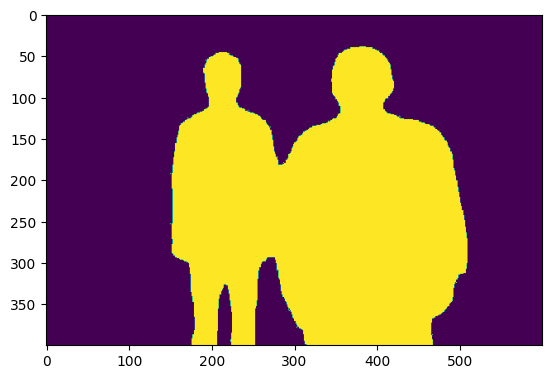

In [13]:
# 세그멘테이션된 이미지의 컬러값을 추출
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
# plt.imshow(seg_map, cmap='gray')
plt.imshow(seg_map)
plt.show()

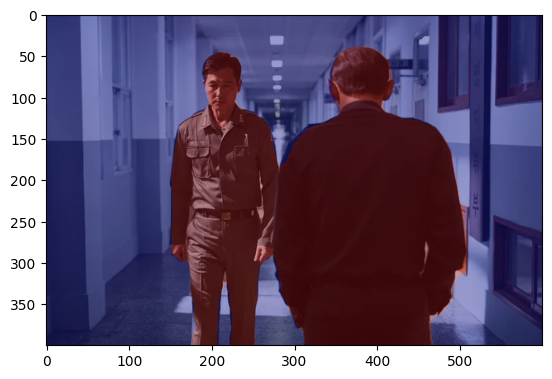

In [14]:
# 원본 이미지 복사
img_show = img_orig.copy()
# True, False인 값을 각각 255, 0으로 변환하여 마스크 생성
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적절한 컬러로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스크를 합성 비율 0.6, 0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

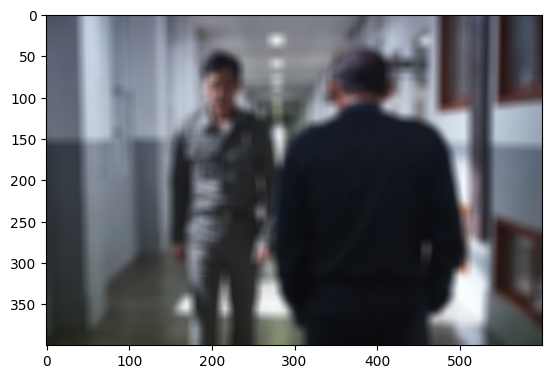

In [15]:
img_orig_blur = cv2.blur(img_orig, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

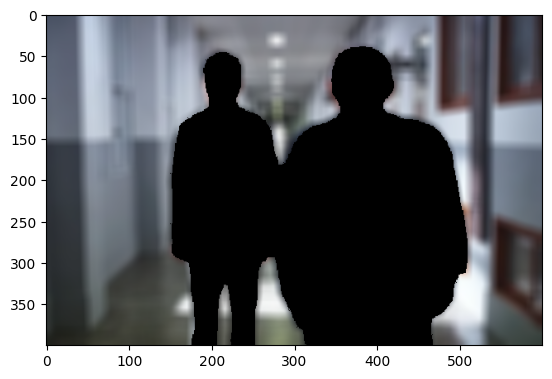

In [17]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

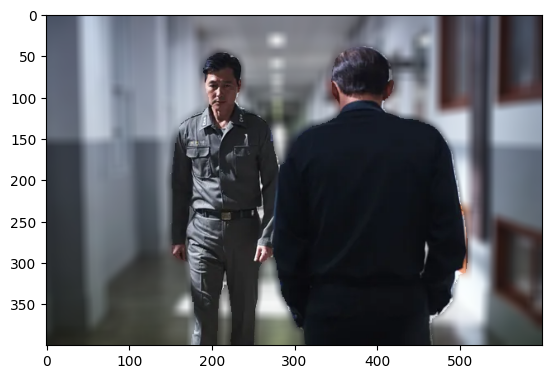

In [18]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()